In [25]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [12]:
mat1 = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_1.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse.mat',squeeze_me=1)
#mat5

In [13]:
respLo = mat1['respLo']
respHi = mat1['respHi']
button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']


In [14]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}

a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}

a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}

a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}

your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}

In [15]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')

dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')

dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')

dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['tactor'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])


In [16]:
dataFdict1.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

In [17]:
dataMelt1 = pd.melt(dataFdict1)
dataMelt1['sid'] = '693ffd'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
dataMelt2['sid'] = '693ffd'
dataMelt2['block'] = '2'



               
dataMelt3 = pd.melt(dataFdict3)
dataMelt3['sid'] = 'c19968'
dataMelt3['block'] = '1'



dataMelt4 = pd.melt(dataFdict4)
dataMelt4['sid'] = 'c19968'
dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
dataMelt5['sid'] = 'acabb1'
dataMelt5['block'] = '1'

In [18]:
dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
#dataMelt4
#dataMelt5

In [19]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5]
result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]
resultTrim.groupby(['experiment','sid','block']).mean()
#resultTrim
#resultNoNa = result.dropna()
#resultNoNa



response time (ms)
experiment     sid    block                    
100 ms         693ffd 2              514.826240
               c19968 1              280.135680
                      2              307.735040
200 ms         693ffd 1              492.863488
                      2              474.742784
               acabb1 1              467.443512
               c19968 1              263.202816
                      2              254.259200
400 ms         693ffd 1              567.134891
                      2              479.232000
               c19968 1              262.813696
                      2              271.017984
800 ms         693ffd 1              557.711360
                      2              642.098062
               c19968 1              285.321216
                      2              256.587776
no stimulation c19968 1              449.986560
off target     693ffd 1              484.802560
tactor         693ffd 1              228.778846
                      2              233.951232
               acabb1 1              329.209394
               c19968 1              228.468736
                      2              219.877376

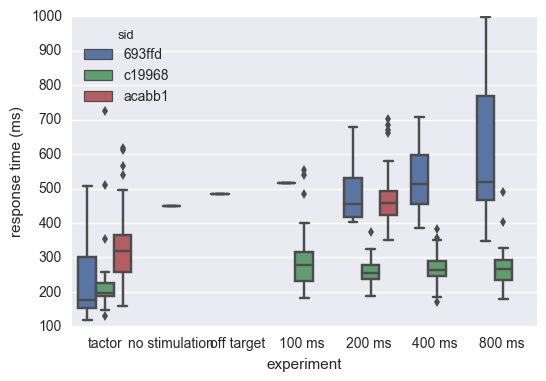

In [26]:
frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='sid',orient="v", data = resultTrim,order = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
#frame1.axes.get_xaxis().set_visible(False)
#frame1.legend(resultTrim.experiment)
fig1 = plt.gcf()
#fig.set_size_inches(10.5, 10.5)
#fig1.savefig('responseTimesBySID.png', dpi=300)

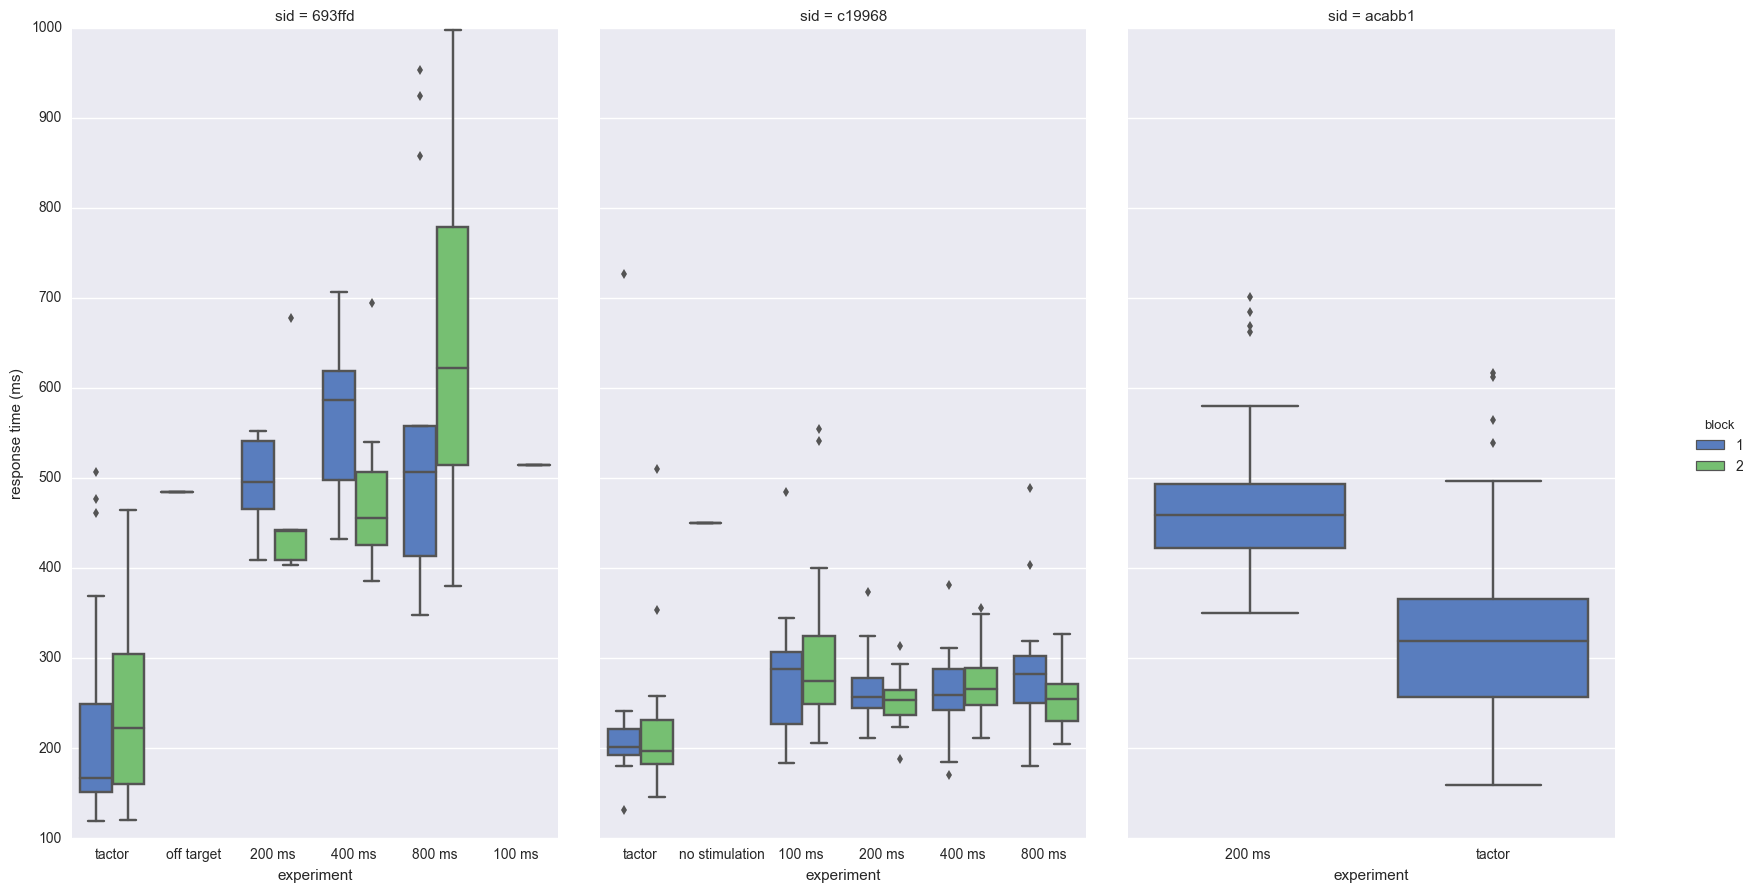

In [27]:
g = sns.FacetGrid(resultTrim,col="sid",size=4,aspect=0.7,sharex=False)
(g.map(sns.boxplot, "experiment","response time (ms)","block",palette="muted")
 .despine(left=True)
 .add_legend(title="block"))
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 10.5)
#fig2.savefig('responseTimesByBlock.png', dpi=300)

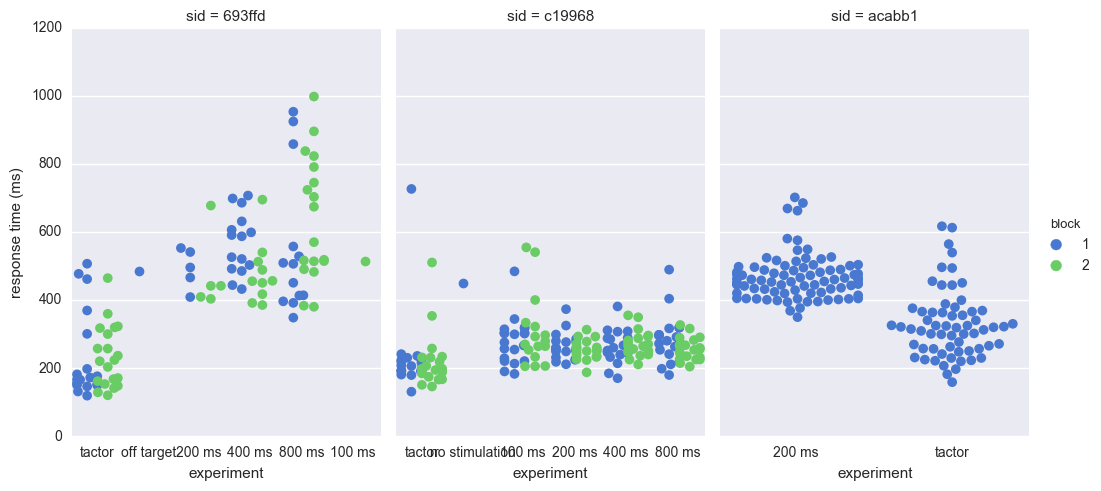

In [29]:
frame4 = sns.FacetGrid(resultTrim,col="sid",size=5,aspect=0.7,sharex=False)
(frame4.map(sns.swarmplot,"experiment","response time (ms)","block",split="True",palette="muted",size=7)
 .despine(left=True)
 .add_legend(title="block")
)
fig3 = plt.gcf()
#fig3.set_size_inches(18.5, 10.5)
#fig3.savefig('swarmByBlock.png', dpi=300)

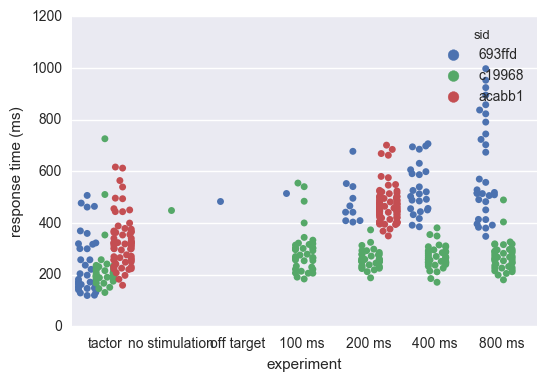

In [30]:
frame2 = sns.swarmplot(x = 'experiment',y='response time (ms)',hue='sid',data = resultTrim, split="True",order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
fig4 = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig4.savefig('swarmSID.png', dpi=300)

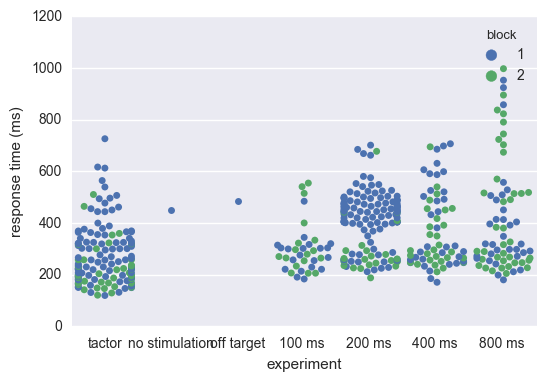

In [31]:
#frame3 = sns.boxplot(x = 'experiment',y='response times',hue='sid',data = resultTrim,order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame3 = sns.swarmplot(x = 'experiment',y='response time (ms)',data = resultTrim,hue='block',order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
#frame3 = sns.swarmplot(x = 'experiment',y='response times',data = resultTrim,hue='sid',color="0.1")

In [33]:
# convert Pandas Data Frame to CSV, then read into matlab, resave
resultTrim.to_csv('resultTrim.csv', sep=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F34D43860>]], dtype=object)

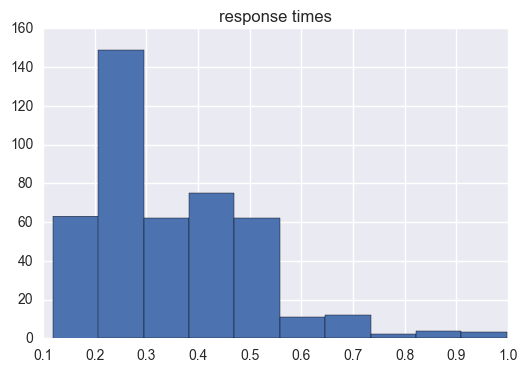

In [48]:
resultTrim.hist()

TypeError: cannot perform reduce with flexible type

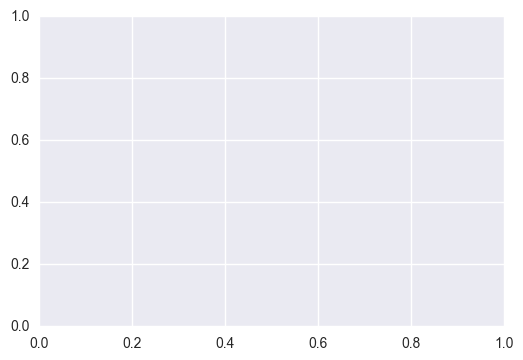

In [50]:
fig, ax = plt.subplots()
for a in resultTrim.columns:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

In [20]:
#from bokeh.charts import BoxPlot, show
#from bokeh.sampledata.autompg import autompg as df
#output_notebook


In [21]:

p = BoxPlot(resultTrim, values='response times', label=['sid','experiment'],color='experiment',
            title="Response Times")

show(p)